<a href="https://colab.research.google.com/github/Umang1103/Diabetic-Retinopathy-Detection-EyePACS/blob/main/retinal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retinal Fundus Image Experimental Analysis

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
img1 = mpimg.imread("/content/drive/MyDrive/My_collab_notebook/image_processing/img1.jpeg")
img1.shape

(794, 1024, 3)

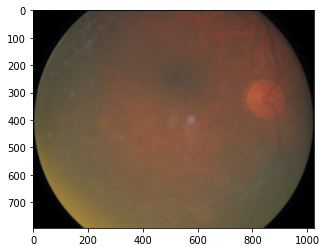

In [36]:
plt.imshow(img1)

In [37]:
img1.ndim, img1.shape

(3, (794, 1024, 3))

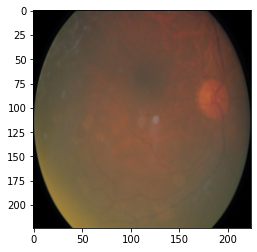

In [38]:
img1 = cv2.resize(img1, (224, 224), interpolation=cv2.INTER_AREA)
plt.imshow(img1)

In [39]:
def plot(img):
  plt.figure(figsize=(20, 5))
  for i in range(1, 5):
        plt.subplot(1, 4, i)
        plt.imshow(img[i-1], aspect="auto")
        plt.axis(False);

In [40]:
red_img = np.full((224, 224, 3), (255, 0, 0), np.uint8)
blue_img = np.full((224, 224, 3), (0, 0, 255), np.uint8)
green_img = np.full((224, 224, 3), (0, 255, 0), np.uint8)
# plot([red_img, green_img, blue_img, img1])

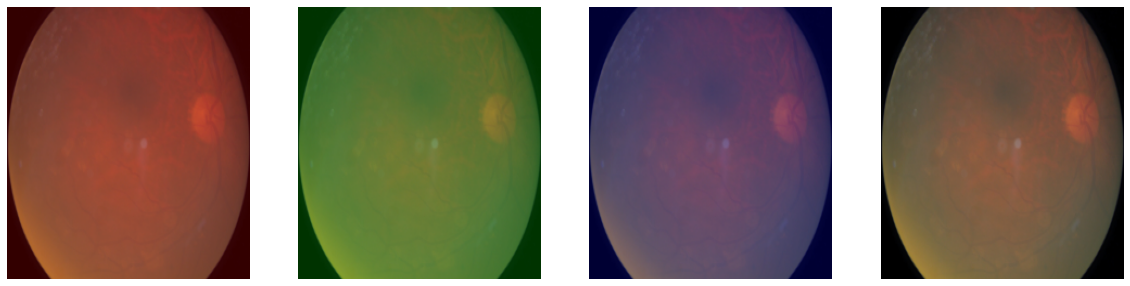

In [41]:
fused_red  = cv2.addWeighted(img1, 0.8, red_img, 0.2, 0)
fused_green  = cv2.addWeighted(img1, 0.8, green_img, 0.2, 0)
fused_blue  = cv2.addWeighted(img1, 0.8, blue_img, 0.2, 0)
plot([fused_red, fused_green, fused_blue, img1])

In [42]:
IMG_SHAPE = (227, 227)

In [43]:
gauss_red  = cv2.GaussianBlur(fused_red, IMG_SHAPE, 0)
gauss_green  = cv2.GaussianBlur(fused_green, IMG_SHAPE, 0)
gauss_blue  = cv2.GaussianBlur(fused_blue, IMG_SHAPE, 0)
gauss_org  = cv2.GaussianBlur(img1, IMG_SHAPE, 0)
# plot([gauss_red, gauss_green, gauss_blue, gauss_org])

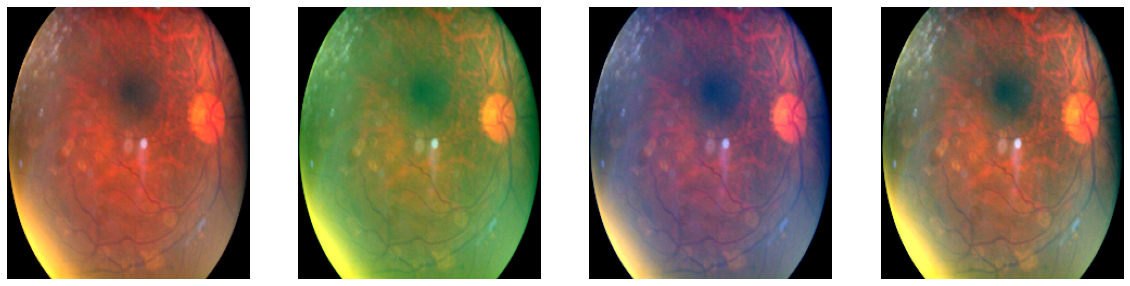

In [44]:
sharp_red = cv2.addWeighted(fused_red, 4.5, gauss_red, -3.5, 0)
sharp_green = cv2.addWeighted(fused_green, 4.5, gauss_green, -3.5, 0)
sharp_blue = cv2.addWeighted(fused_blue, 4.5, gauss_blue, -3.5, 0)
sharp_org = cv2.addWeighted(img1, 4.5, gauss_org, -3.5, 0)
plot([sharp_red, sharp_green, sharp_blue, sharp_org])

Noise removal using **Median Filter**.

In [45]:
# Function for median filtering
def median_filter(img):
  mask = cv2.medianBlur(img, 27)
  img_median  = cv2.addWeighted(img, 1.5, mask, -0.5, 0)
  return img_median

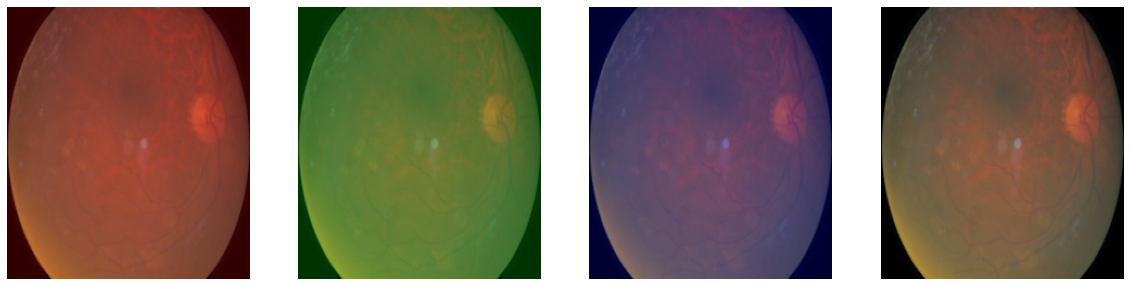

In [46]:
# Applying median filtering
median_org = median_filter(img1)
median_red = median_filter(fused_red)
median_green = median_filter(fused_green)
median_blue = median_filter(fused_blue)
plot([median_red, median_green, median_blue, median_org])

## Histogram Equalization

In [47]:
def hist_equalizer(img):
  b, g, r = cv2.split(img)
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(img_hsv)
  v = cv2.equalizeHist(v)
  merged_hsv = cv2.merge((h, s, v))
  enhanced_bgr = cv2.cvtColor(merged_hsv, cv2.COLOR_HSV2BGR)

  return enhanced_bgr

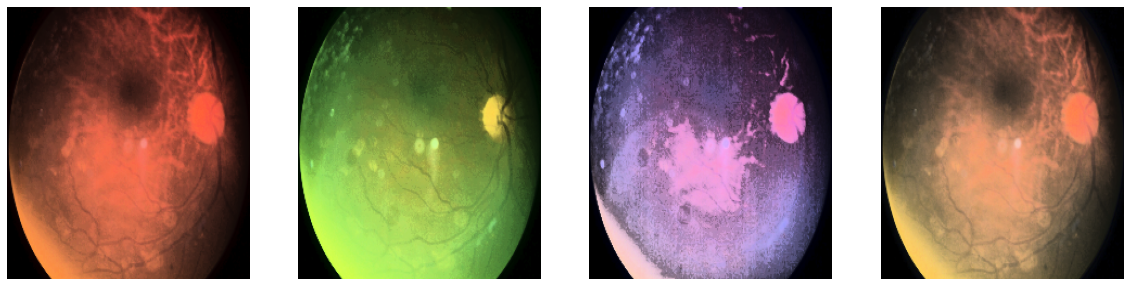

In [48]:
equalize_org = hist_equalizer(img1)
equalize_red = hist_equalizer(fused_red)
equalize_green = hist_equalizer(fused_green)
equalize_blue = hist_equalizer(fused_blue)
plot([equalize_red, equalize_green, equalize_blue, equalize_org])

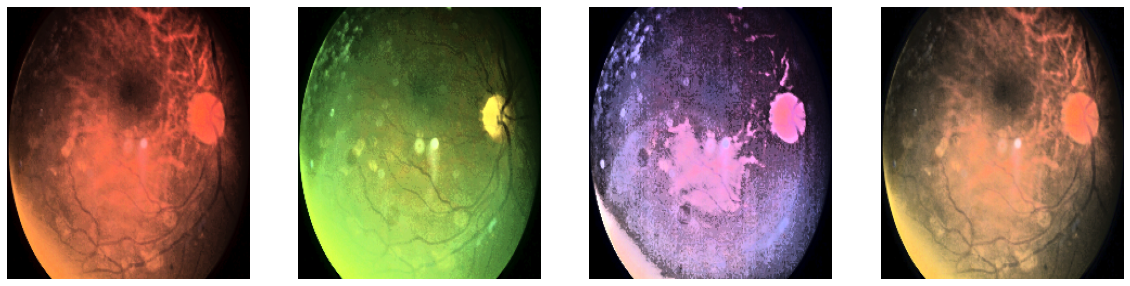

In [49]:
# Applying median filtering to remove noise from HE images
equalize_median_org = median_filter(equalize_org)
equalize_median_red = median_filter(equalize_red)
equalize_median_green = median_filter(equalize_green)
equalize_median_blue = median_filter(equalize_blue)
plot([equalize_median_red, equalize_median_green, equalize_median_blue, equalize_median_org])

## CLAHE

In [50]:
def clahe(img):
  # declaration of CLAHE
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  # Applying CLAHE on intensity channel
  h, s, v = cv2.split(img_hsv)
  clh = cv2.createCLAHE(clipLimit=9.0)
  v = clh.apply(v)
  merged_hsv = cv2.merge((h, s, v))
  enhanced_bgr = cv2.cvtColor(merged_hsv, cv2.COLOR_HSV2BGR)

  return enhanced_bgr
  # return img_clh

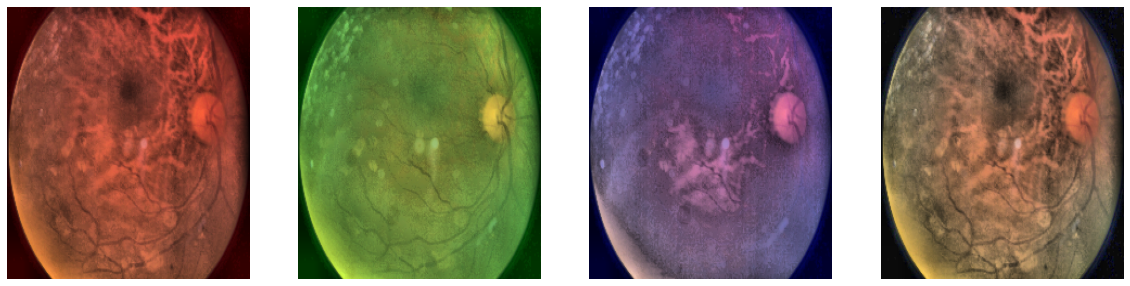

In [51]:
# Applying CLAHE on intensity channel
clh_org = clahe(img1)
clh_red = clahe(fused_red)
clh_green = clahe(fused_green)
clh_blue = clahe(fused_blue)
plot([clh_red, clh_green, clh_blue, clh_org])

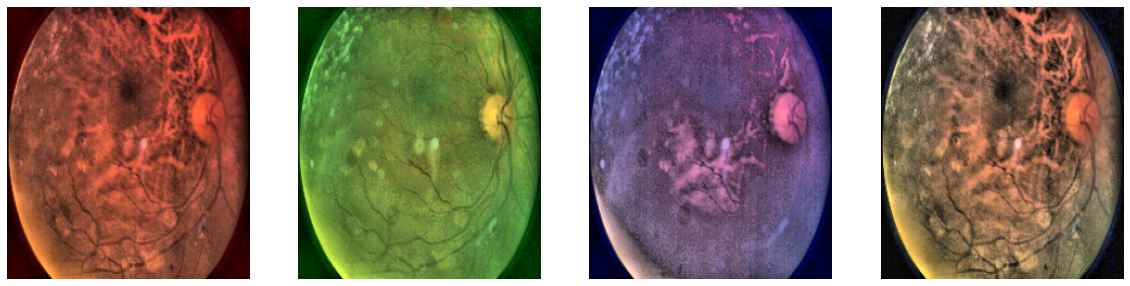

In [52]:
# Applying median filtering on CLAHE images
clh_median_org = median_filter(clh_org)
clh_median_red = median_filter(clh_red)
clh_median_green = median_filter(clh_green)
clh_median_blue = median_filter(clh_blue)
plot([clh_median_red, clh_median_green, clh_median_blue, clh_median_org])

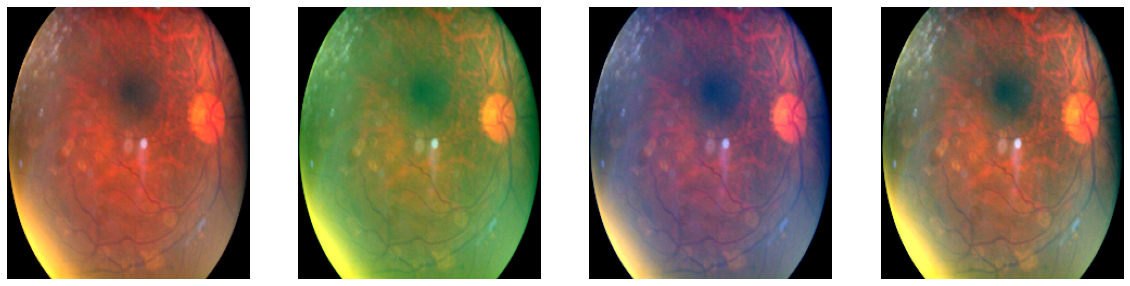

In [53]:
plot([sharp_red, sharp_green, sharp_blue, sharp_org])

Let's try applying CLAHE on green channel

After analysis, green channel is found to display high contrast with reduced noise. So the rest of analysis will deal with the applications of operations on green channel.

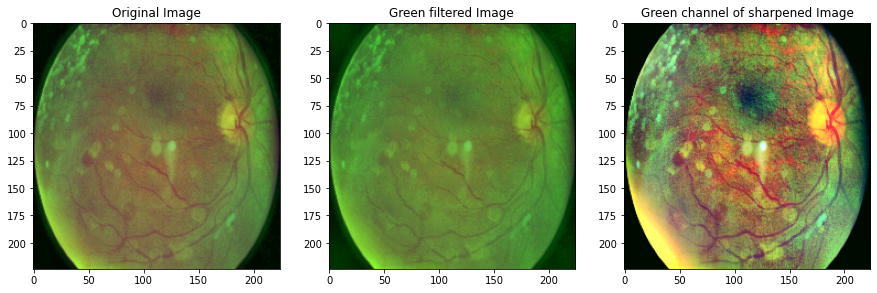

In [54]:
# Applying CLAHE on green channel of original image
plt.figure(figsize=(15, 5))

b, g, r = cv2.split(img1)
clh = cv2.createCLAHE(clipLimit=10.0)
g = clh.apply(g)
merged_bgr_green_org = cv2.merge((b, g, r))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(merged_bgr_green_org)

# Applying CLAHE on green channel of fused green image
b, g, r = cv2.split(fused_green)
g = clh.apply(g)
merged_bgr_green_fused = cv2.merge((b, g, r))
plt.subplot(1, 3, 2)
plt.title("Green filtered Image")
plt.imshow(merged_bgr_green_fused)

# Applying CLAHE on green channel of sharp original image(gaussian noise removed)
b, g, r = cv2.split(sharp_org)
g = clh.apply(g)
merged_bgr_green_gauss = cv2.merge((b, g, r))
plt.subplot(1, 3, 3)
plt.title("Green channel of sharpened Image")
plt.imshow(merged_bgr_green_gauss)

## Adaptive Thresholding - Vessel segmentation

Methods for the proposed vessel segmentation task:

i. Read the original RGB image.

ii. Extract the green plane of the image.

iii. Intensify the image using CLAHE and remove noise using median filtering.

iv. Extract blood vessels using mean-C thresholding.

v. Remove the isolated pixels using morphological cleaning operation.

In [99]:
MAX_VALUE = 96 # @param {type:'slider', min:0, max:255}
CONSTANT = 0.042 # @param {type:'slider', min:0, max:100}
BLOCKSIZE = 13 # @param {type:'slider', min:0, max:100}

(-0.5, 223.5, 223.5, -0.5)

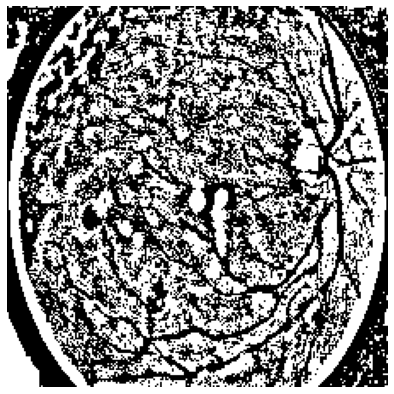

In [100]:
# 2. Extract the green plane of the image. 
b, g, r = cv2.split(img1)
# 3.1 Intensify the image using CLAHE.
clh = cv2.createCLAHE(clipLimit=5.0)
g = clh.apply(g)
# 3.2 Remove noise using median filtering.
filtered_img = median_filter(g)
# 4. Extract blood vessels using mean-C thresholding.
thresh = cv2.adaptiveThreshold(filtered_img, MAX_VALUE, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, BLOCKSIZE, CONSTANT)   
plt.figure(figsize=(10, 7)) 
# 5. Remove the isolated pixels using morphological cleaning operation.
kernel = np.ones((1, 1), np.uint8)
morph_img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(morph_img, cmap="gray")
plt.axis(False)